In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
keras=tf.keras

from keras.preprocessing import image, image_dataset_from_directory


In [9]:
img=image.load_img("E:\Machine Learning\Image Classification\image.png")
numpy_img=image.img_to_array(img)

In [11]:
numpy_img.shape

(667, 1000, 3)

In [12]:
shorten_img=img.resize((150,150))

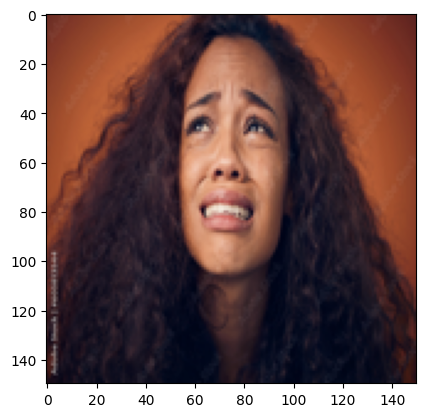

In [15]:
plt.imshow(shorten_img)

In [20]:
shorten_img.size

(150, 150)

In [26]:
img_array = np.expand_dims(shorten_img, axis=0)
img_array.shape

(1, 150, 150, 3)

In [46]:
new=img_array.reshape(1,150,150,3)
new

array([[[[105,  43,  36],
         [107,  44,  36],
         [109,  46,  37],
         ...,
         [ 95,  37,  33],
         [ 93,  35,  34],
         [ 90,  34,  32]],

        [[106,  44,  36],
         [108,  45,  36],
         [110,  47,  37],
         ...,
         [ 96,  38,  33],
         [ 94,  36,  33],
         [ 92,  35,  33]],

        [[108,  45,  36],
         [109,  46,  37],
         [111,  47,  37],
         ...,
         [ 97,  38,  33],
         [ 95,  37,  33],
         [ 93,  35,  33]],

        ...,

        [[ 34,  16,  26],
         [ 48,  20,  23],
         [ 23,  12,  26],
         ...,
         [ 66,  25,  19],
         [ 47,  18,  21],
         [ 35,  15,  24]],

        [[ 33,  15,  27],
         [ 26,  13,  26],
         [ 22,  11,  24],
         ...,
         [ 65,  24,  19],
         [ 52,  19,  20],
         [ 40,  16,  23]],

        [[ 34,  14,  24],
         [ 21,  10,  23],
         [ 22,  11,  25],
         ...,
         [ 60,  23,  18],
        

In [54]:
from keras.layers import Conv2D,Dense,Flatten,BatchNormalization,Dropout,MaxPooling2D
from keras import Sequential

model=Sequential(
    [
        Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(128,(3,3),activation="relu"),
        MaxPooling2D((2,2)),
        
        Flatten(),

        Dense(128,activation="relu"),
        BatchNormalization(),
        Dropout(.20),
        
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(.20),

        Dense(32,activation="relu"),
        BatchNormalization(),
        Dropout(.20),

        Dense(5,activation="relu"),
        BatchNormalization(),
        Dropout(.20),

    ]
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,839,769 (18.46 MB)

 Trainable params: 4,839,311 (18.46 MB)

 Non-trainable params: 458 (1.79 KB)

In [55]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])